import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
BTC = yf.download('BTC-USD', start='2022-12-29', end='2022-12-30',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [3]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-29 00:00:00+00:00,16552.322266,16552.322266,16552.322266,16552.322266,16552.322266,0
2022-12-29 00:01:00+00:00,16553.291016,16553.291016,16553.291016,16553.291016,16553.291016,0
2022-12-29 00:02:00+00:00,16552.767578,16552.767578,16552.767578,16552.767578,16552.767578,0
2022-12-29 00:03:00+00:00,16552.398438,16552.398438,16552.398438,16552.398438,16552.398438,566272
2022-12-29 00:04:00+00:00,16554.373047,16554.373047,16554.373047,16554.373047,16554.373047,0
...,...,...,...,...,...,...
2022-12-29 23:55:00+00:00,16638.638672,16638.638672,16638.638672,16638.638672,16638.638672,1280000
2022-12-29 23:56:00+00:00,16640.287109,16640.287109,16640.287109,16640.287109,16640.287109,0
2022-12-29 23:57:00+00:00,16640.042969,16640.042969,16640.042969,16640.042969,16640.042969,0


In [4]:
ETH = yf.download('ETH-USD', start='2022-12-29', end='2022-12-30',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [5]:
ETH

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-29 00:00:00+00:00,1190.010132,1190.010132,1190.010132,1190.010132,1190.010132,0
2022-12-29 00:01:00+00:00,1190.177856,1190.177856,1190.177856,1190.177856,1190.177856,0
2022-12-29 00:02:00+00:00,1190.218140,1190.218140,1190.218140,1190.218140,1190.218140,117760
2022-12-29 00:03:00+00:00,1190.130981,1190.130981,1190.130981,1190.130981,1190.130981,749568
2022-12-29 00:04:00+00:00,1190.167358,1190.167358,1190.167358,1190.167358,1190.167358,0
...,...,...,...,...,...,...
2022-12-29 23:55:00+00:00,1201.519531,1201.519531,1201.519531,1201.519531,1201.519531,1732864
2022-12-29 23:56:00+00:00,1201.568481,1201.568481,1201.568481,1201.568481,1201.568481,0
2022-12-29 23:57:00+00:00,1201.593018,1201.593018,1201.593018,1201.593018,1201.593018,0


In [6]:
S1_0 = BTC['Open'][0]
S2_0 = ETH['Open'][0]

In [7]:
S1_0

16552.322265625

In [8]:
S2_0

1190.0101318359375

In [9]:
lr1 = np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1))
lr2 = np.log(ETH['Adj Close'] / ETH['Adj Close'].shift(1))
mu_1 = lr1.mean() * 1440
mu_2 = lr2.mean() * 1440
sigma_1 = lr1.std() * np.sqrt(1440)
sigma_2 = lr2.std() * np.sqrt(1440)
rho = lr1.corr(lr2)
z_0 = 0.00
gamma = 0.6
delta = 1
T = 1
M = len(BTC)

In [10]:
rho

0.7343621635844595

In [11]:
result = linregress(np.log(BTC['Adj Close']), np.log(ETH['Adj Close']))
beta = result.slope
beta

1.480635270934257

In [12]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))


In [13]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = BTC['Adj Close'][t-1]
    S2[t] = ETH['Adj Close'][t-1]

Text(0.5, 1.0, 'Stock Price')

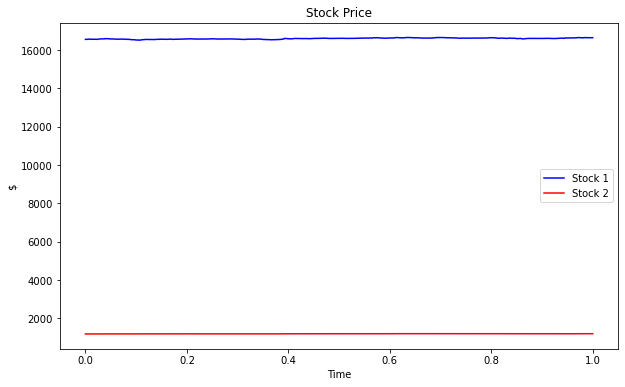

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='Stock 1')
plt.plot(tt, S2, 'r', lw=1.5, label='Stock 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')


Text(0.5, 1.0, 'z')

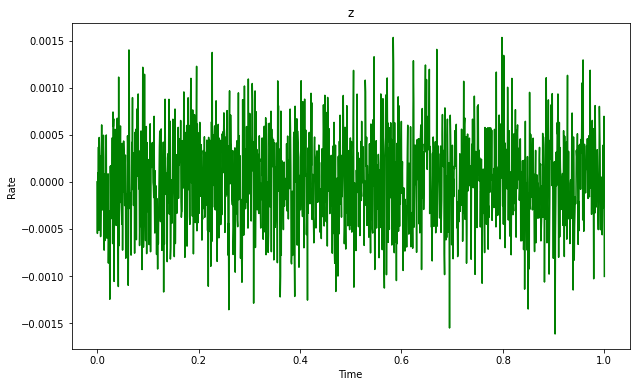

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [16]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

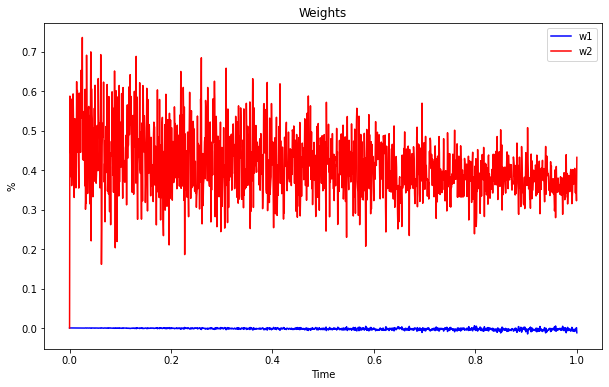

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

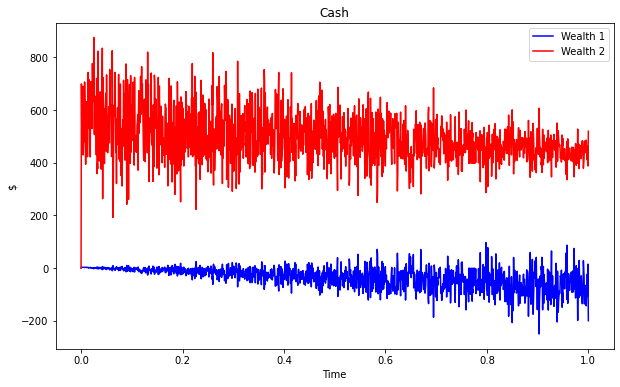

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

In [19]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Wealth')

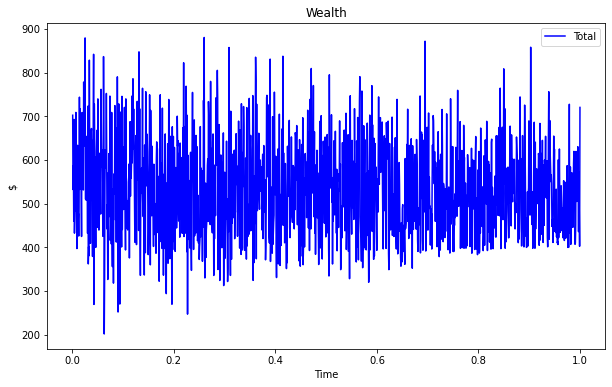

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [21]:
Wealth[1]

array([702.23062022])

In [22]:
Wealth[-1]

array([720.14823518])

In [23]:
(Wealth[-1] - Wealth[1])/Wealth[1]


array([0.02551529])

In [24]:
Pi_1.mean()

-0.0020740124281138513

In [25]:
Pi_2.mean()

0.4132720553287141

460.19120560627834

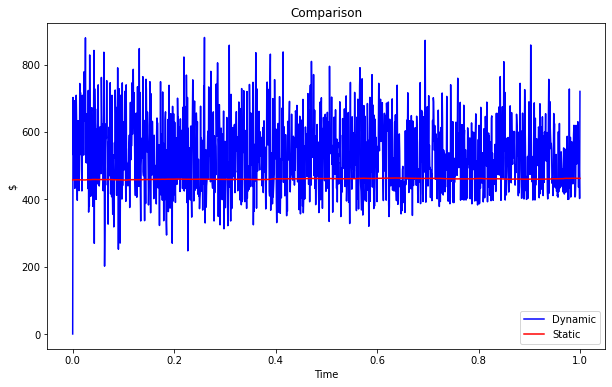

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(tt, abs(Pi_1 * S1) + abs(Pi_2 * S2), 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')
xs=Pi_1.mean() * S1 + Pi_2.mean() * S2
xs.mean()

In [27]:
mu_1

0.0053966839086315435

In [28]:
mu_2

0.00972766218087471

In [29]:
sigma_1

0.005349981847103331

In [30]:
sigma_2

0.006393783464176079